# Prediction of Weight Levels Based On Eating Habits and Physical Activites

### Importing Necessary Libraries

In [2]:
# Basic Libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#import plotly.express as px

#Sampling methods
from sklearn.model_selection import train_test_split, cross_val_score
#Oversamplying
from imblearn.over_sampling import RandomOverSampler

#feature engineering
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

#Feature Selection
#from boruta import BorutaPy

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [3]:
df= pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(2111, 17)

### Renaming Columns

In [5]:
column_rename_dict = {
    'Age': 'Age',
    'Gender': 'Gender',
    'Height': 'Height',
    'Weight': 'Weight',
    'CALC': 'Consumption_Of_Alcohol',
    'FAVC': 'High_Caloric_Food',
    'FCVC': 'Vegetables_in_Meal',
    'NCP': 'Main_Meals',
    'SCC': 'Monitor_Calories',
    'SMOKE': 'Smoking_Habits',
    'CH2O': 'Daily_Water_Intake',
    'family_history_with_overweight': 'Family_History',
    'FAF': 'PhysicalActivity',
    'TUE': 'Time_Using_Technology',
    'CAEC': 'Food_between_Meal',
    'MTRANS': 'Transportation',
    'NObeyesdad': 'Weight_Level'
}
df.rename(columns=column_rename_dict, inplace=True)

In [7]:
df.head()

,Age,Gender,Height,Weight,Consumption_Of_Alcohol,High_Caloric_Food,Vegetables_in_Meal,Main_Meals,Monitor_Calories,Smoking_Habits,Daily_Water_Intake,Family_History,PhysicalActivity,Time_Using_Technology,Food_between_Meal,Transportation,Weight_Level
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
df['Height'] = df['Height'] /100

In [12]:
df.head()

,Age,Gender,Height,Weight,Consumption_Of_Alcohol,High_Caloric_Food,Vegetables_in_Meal,Main_Meals,Monitor_Calories,Smoking_Habits,Daily_Water_Intake,Family_History,PhysicalActivity,Time_Using_Technology,Food_between_Meal,Transportation,Weight_Level
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##### Adding a New Column BMI(Body Mass Index) 

In [15]:
#Calculate BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Insert BMI column after the Weight column
df.insert(df.columns.get_loc('Weight') + 1, 'BMI', df.pop('BMI'))
df['BMI'] = df['BMI'].round(2)


In [16]:
df.head()

,Age,Gender,Height,Weight,BMI,Consumption_Of_Alcohol,High_Caloric_Food,Vegetables_in_Meal,Main_Meals,Monitor_Calories,Smoking_Habits,Daily_Water_Intake,Family_History,PhysicalActivity,Time_Using_Technology,Food_between_Meal,Transportation,Weight_Level
0,21.0,Female,1.62,64.0,24.39,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,24.24,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,23.77,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,26.85,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,28.34,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [20]:
df.shape

(2111, 18)

### Data Description

In [18]:
# Create a dictionary to store the information about the dataset

info_dict = {
    
    'Column': df.columns.tolist(),    # Store the column names in a list
    
    'Non-Null Count': df.count().tolist(), # Store the count of non-null values for each column
    
    'Dtype': df.dtypes.tolist(), # Store the data types of each column
    
    'Null_Percentage' : np.round(( 2111 - df.count()) * 100 / 2111) # Calculate the percentage of null values in each column
    
}


# Create a DataFrame from the info_dict dictionary

Description = pd.DataFrame(info_dict).reset_index(drop = True)

Description

,Column,Non-Null Count,Dtype,Null_Percentage
0,Age,2111,float64,0.0
1,Gender,2111,object,0.0
2,Height,2111,float64,0.0
3,Weight,2111,float64,0.0
4,BMI,2111,float64,0.0
5,Consumption_Of_Alcohol,2111,object,0.0
6,High_Caloric_Food,2111,object,0.0
7,Vegetables_in_Meal,2111,float64,0.0
8,Main_Meals,2111,float64,0.0
9,Monitor_Calories,2111,object,0.0


#### Statistical Summary

In [22]:
df.describe( )  ## The statistical description of the discrete variables in the data set.

,Age,Height,Weight,BMI,Vegetables_in_Meal,Main_Meals,Daily_Water_Intake,PhysicalActivity,Time_Using_Technology
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,29.700137,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,8.011354,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,13.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,24.325000,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,28.720000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,36.015000,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,50.810000,3.000000,4.000000,3.000000,3.000000,2.000000


In [24]:
# Describing the 'Obesity' DataFrame, including only object-type columns and excluding numerical columns
# include='object' specifies that we want to include only object-type columns in the description
# exclude=np.number specifies that we want to exclude numerical columns from the description

df.describe(include = 'object' , exclude = np.number).T

,count,unique,top,freq
Gender,2111,2,Male,1068
Consumption_Of_Alcohol,2111,4,Sometimes,1401
High_Caloric_Food,2111,2,yes,1866
Monitor_Calories,2111,2,no,2015
Smoking_Habits,2111,2,no,2067
Family_History,2111,2,yes,1726
Food_between_Meal,2111,4,Sometimes,1765
Transportation,2111,5,Public_Transportation,1580
Weight_Level,2111,7,Obesity_Type_I,351


### Exploratory Data Analysis

#### Data Cleaning

#### Checking Duplicates

In [29]:
df[df.duplicated()]

,Age,Gender,Height,Weight,BMI,Consumption_Of_Alcohol,High_Caloric_Food,Vegetables_in_Meal,Main_Meals,Monitor_Calories,Smoking_Habits,Daily_Water_Intake,Family_History,PhysicalActivity,Time_Using_Technology,Food_between_Meal,Transportation,Weight_Level
98,21.0,Female,1.52,42.0,18.18,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
106,25.0,Female,1.57,55.0,22.31,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,21.0,Male,1.62,70.0,26.67,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,26.67,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,26.67,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
209,22.0,Female,1.69,65.0,22.76,Sometimes,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,16.0,Female,1.66,58.0,21.05,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
460,18.0,Female,1.62,55.0,20.96,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
467,22.0,Male,1.74,75.0,24.77,no,yes,3.0,3.0,no,no,1.0,yes,1.0,0.0,Frequently,Automobile,Normal_Weight
496,18.0,Male,1.72,53.0,17.92,Sometimes,yes,2.0,3.0,no,no,2.0,yes,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [30]:
df.drop_duplicates(keep="first",inplace= True)

In [31]:
df.reset_index(drop=True,inplace=True)

In [32]:
df.shape

(2087, 18)

#### Checking for Null Values

In [34]:
df.isnull().sum()

Age                       0
Gender                    0
Height                    0
Weight                    0
BMI                       0
Consumption_Of_Alcohol    0
High_Caloric_Food         0
Vegetables_in_Meal        0
Main_Meals                0
Monitor_Calories          0
Smoking_Habits            0
Daily_Water_Intake        0
Family_History            0
PhysicalActivity          0
Time_Using_Technology     0
Food_between_Meal         0
Transportation            0
Weight_Level              0
dtype: int64

#### Just checking BMI and Weight_level are correctly given or Not


In [43]:
def get_weight_level(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal_Weight'
    elif 25 <= bmi < 39.9:
        return 'Over_weight'
    else:
        return 'Obesity'


In [44]:
df['Calculated_Weight_Level'] = df['BMI'].apply(get_weight_level)

In [45]:
df['Weight_Level_Check'] = df['Weight_Level'] == df['Calculated_Weight_Level']


In [46]:
result_df = df[['BMI', 'Weight_Level', 'Weight_Level_Check']]
result_df

,BMI,Weight_Level,Weight_Level_Check
0,24.39,Normal_Weight,True
1,24.24,Normal_Weight,True
2,23.77,Normal_Weight,True
3,26.85,Overweight_Level_I,False
4,28.34,Overweight_Level_II,False
...,...,...,...
2082,44.90,Obesity_Type_III,False
2083,43.74,Obesity_Type_III,False
2084,43.54,Obesity_Type_III,False
2085,44.07,Obesity_Type_III,False


In [47]:
df.	Weight_Level_Check.value_counts()

Weight_Level_Check
False    1808
True      279
Name: count, dtype: int64

#### Copy(For further analysis)

In [48]:
import copy
df_new = copy.deepcopy(df)

In [54]:
df_new['Height'] = df_new['Height'].round(3)
df_new['Weight'] = df_new['Weight'].round(2)
df_new['Age'] = df_new['Age'].round()

In [55]:
df_new.head()

,Age,Gender,Height,Weight,BMI,Consumption_Of_Alcohol,High_Caloric_Food,Vegetables_in_Meal,Main_Meals,Monitor_Calories,Smoking_Habits,Daily_Water_Intake,Family_History,PhysicalActivity,Time_Using_Technology,Food_between_Meal,Transportation,Calculated_Weight_Level
0,21.0,Female,1.62,64.0,24.39,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,24.24,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,23.77,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,26.85,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Over_weight
4,22.0,Male,1.78,89.8,28.34,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Over_weight


 Droped some columns for Analysis

In [59]:
df_new.dtypes

Age                        float64
Gender                      object
Height                     float64
Weight                     float64
BMI                        float64
Consumption_Of_Alcohol      object
High_Caloric_Food           object
Vegetables_in_Meal         float64
Main_Meals                 float64
Monitor_Calories            object
Smoking_Habits              object
Daily_Water_Intake         float64
Family_History              object
PhysicalActivity           float64
Time_Using_Technology      float64
Food_between_Meal           object
Transportation              object
Calculated_Weight_Level     object
dtype: object

In [60]:
cat_cols= df_new.describe(include='object').columns
num_cols= df_new.describe(exclude='object').columns

In [61]:
cat_cols

Index(['Gender', 'Consumption_Of_Alcohol', 'High_Caloric_Food',
       'Monitor_Calories', 'Smoking_Habits', 'Family_History',
       'Food_between_Meal', 'Transportation', 'Calculated_Weight_Level'],
      dtype='object')

In [149]:
num_cols

Index(['Age', 'Height', 'Weight', 'BMI', 'Vegetables_in_Meal', 'Main_Meals',
       'Daily_Water_Intake', 'PhysicalActivity', 'Time_Using_Technology'],
      dtype='object')

Gender
Male      1052
Female    1035
Name: count, dtype: int64
There are totaly 2 unique Gender
Axes(0.125,0.11;0.775x0.77)


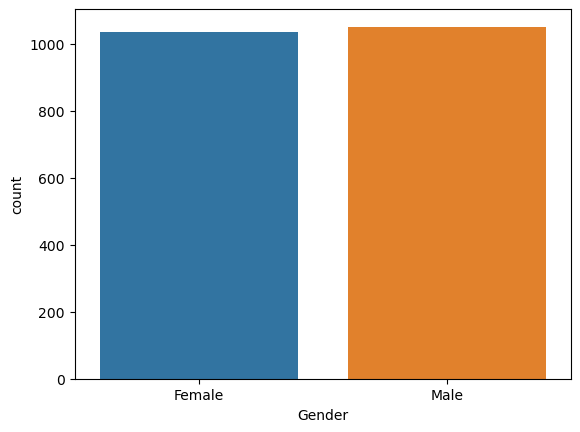


Consumption_Of_Alcohol
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64
There are totaly 4 unique Consumption_Of_Alcohol
Axes(0.125,0.11;0.775x0.77)


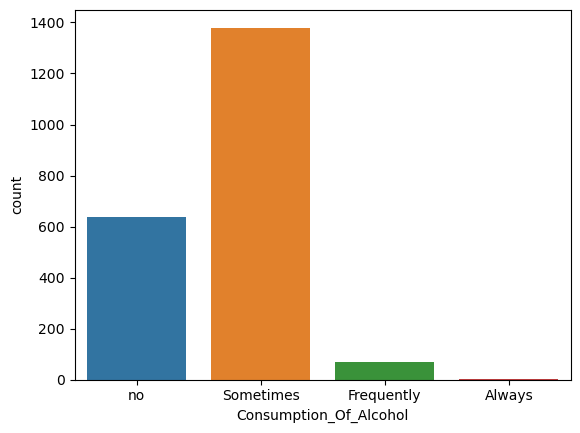


High_Caloric_Food
yes    1844
no      243
Name: count, dtype: int64
There are totaly 2 unique High_Caloric_Food
Axes(0.125,0.11;0.775x0.77)


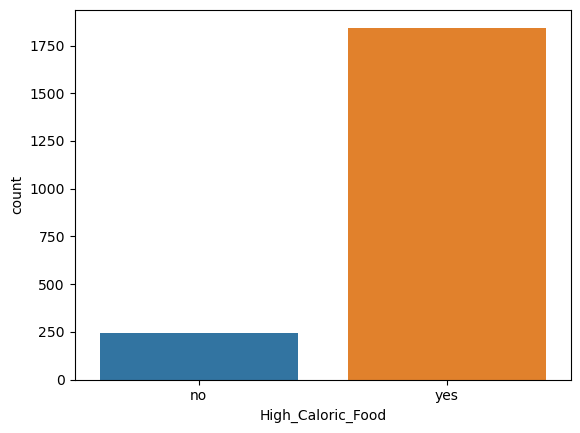


Monitor_Calories
no     1991
yes      96
Name: count, dtype: int64
There are totaly 2 unique Monitor_Calories
Axes(0.125,0.11;0.775x0.77)


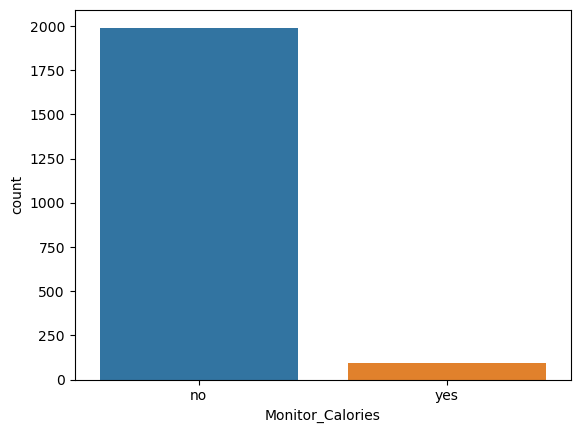


Smoking_Habits
no     2043
yes      44
Name: count, dtype: int64
There are totaly 2 unique Smoking_Habits
Axes(0.125,0.11;0.775x0.77)


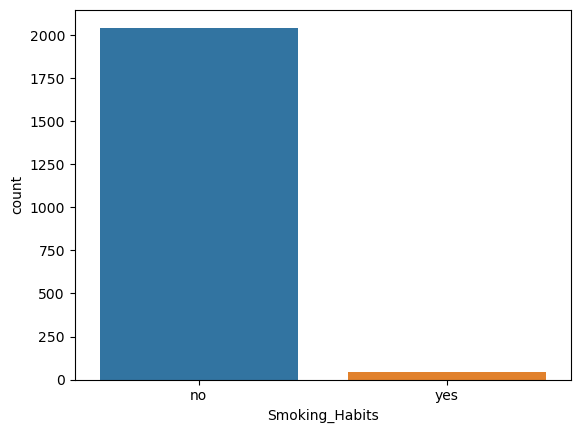


Family_History
yes    1722
no      365
Name: count, dtype: int64
There are totaly 2 unique Family_History
Axes(0.125,0.11;0.775x0.77)


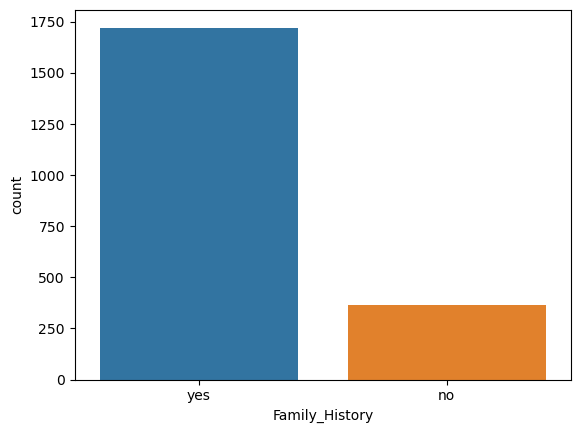


Food_between_Meal
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64
There are totaly 4 unique Food_between_Meal
Axes(0.125,0.11;0.775x0.77)


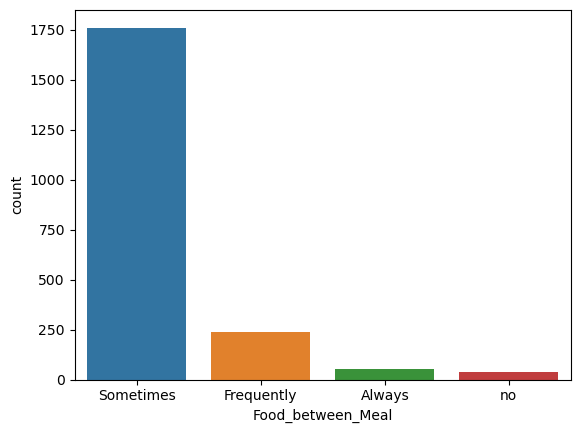


Transportation
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64
There are totaly 5 unique Transportation
Axes(0.125,0.11;0.775x0.77)


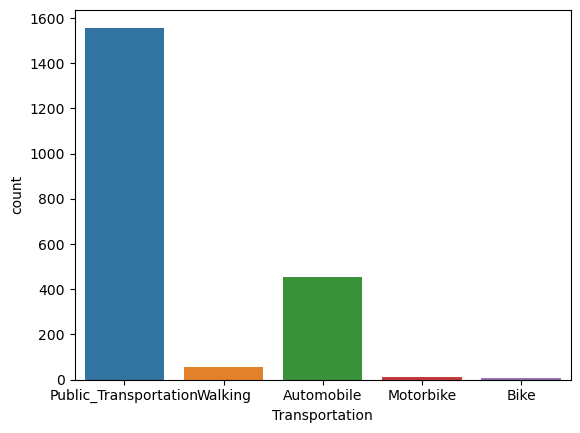


Calculated_Weight_Level
Over_weight      1255
Normal_Weight     291
Obesity           276
Underweight       265
Name: count, dtype: int64
There are totaly 4 unique Calculated_Weight_Level
Axes(0.125,0.11;0.775x0.77)


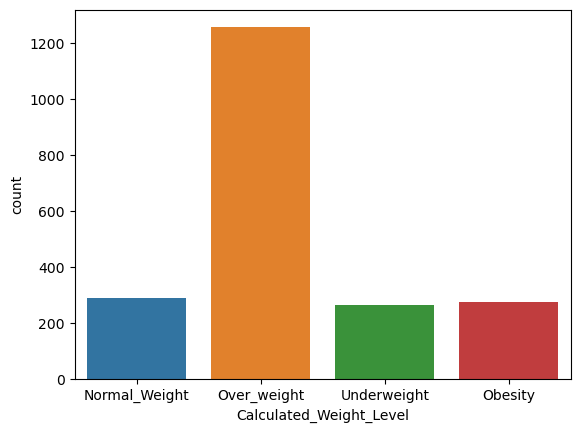

In [68]:
for i in cat_cols:
    print(df_new[i].value_counts())
    print(f'There are totaly {df_new[i].nunique()} unique {i}')
    print(sns.countplot(x=df_new[i]))
    plt.show()

    
    print()

Axes(0.125,0.11;0.775x0.77)


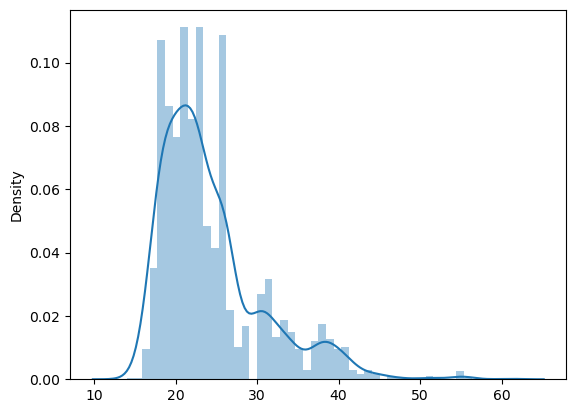


Axes(0.125,0.11;0.775x0.77)


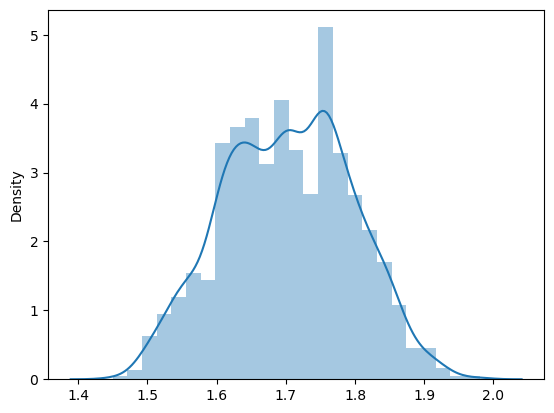


Axes(0.125,0.11;0.775x0.77)


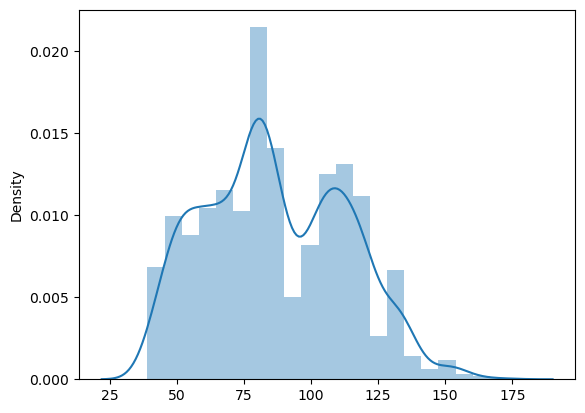


Axes(0.125,0.11;0.775x0.77)


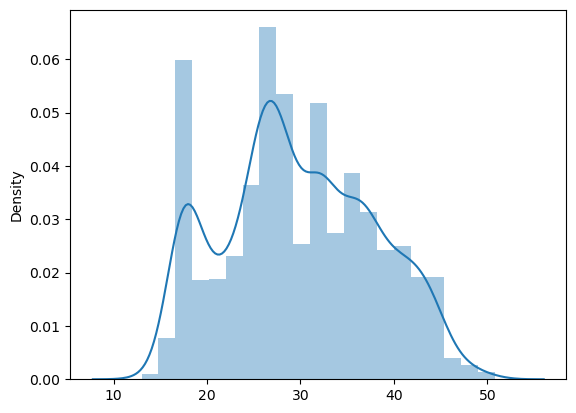


Axes(0.125,0.11;0.775x0.77)


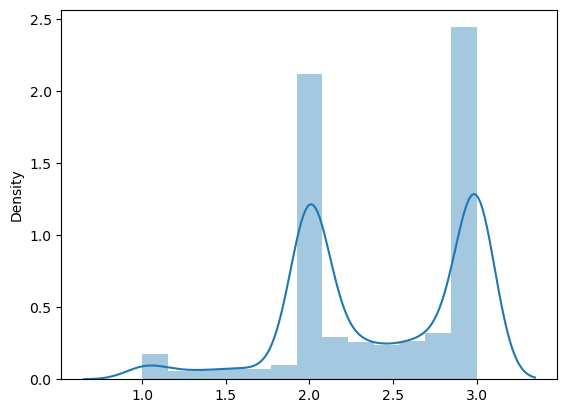


Axes(0.125,0.11;0.775x0.77)


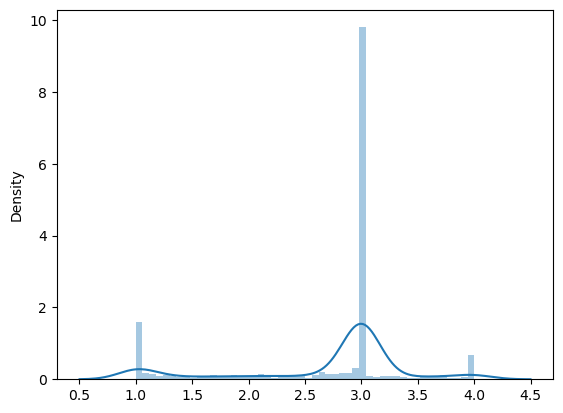


Axes(0.125,0.11;0.775x0.77)


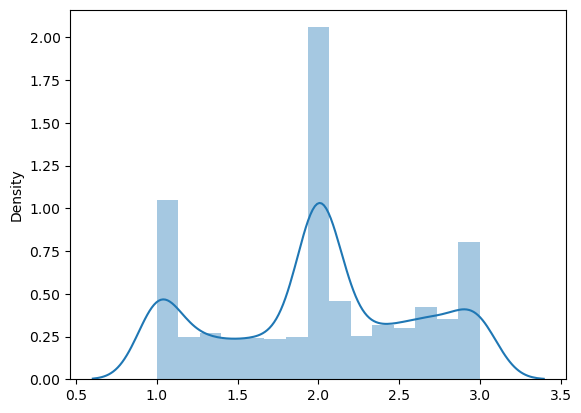


Axes(0.125,0.11;0.775x0.77)


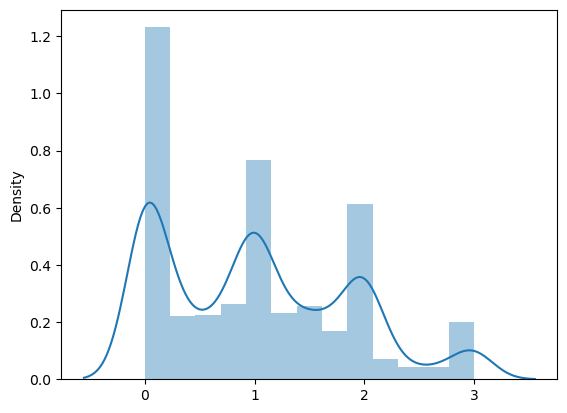


Axes(0.125,0.11;0.775x0.77)


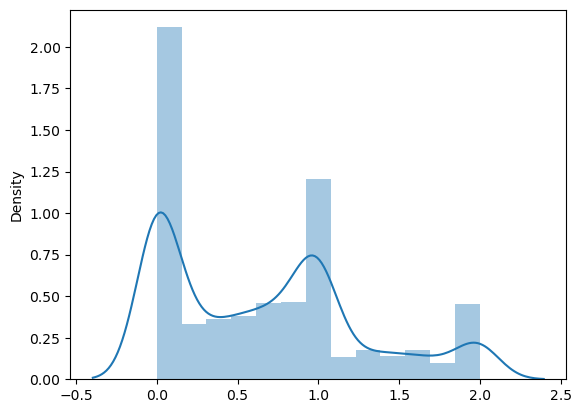

In [87]:
for i in num_cols:
    print(sns.distplot(x=df_new[i]))
    plt.show()
    
    print()
    

### Relationship between Features and Calculated_Weight_Level

In this section, we analyze relationship between different features with respect to Calculated_Weight_Level. We see how different feature values show different Weight Levels. We also plot different kinds of diagrams to visualize our data and findings.



In [88]:
df_new.Calculated_Weight_Level.value_counts()

Calculated_Weight_Level
Over_weight      1255
Normal_Weight     291
Obesity           276
Underweight       265
Name: count, dtype: int64

In [89]:
df_new.Calculated_Weight_Level.value_counts(normalize=True)*100

Calculated_Weight_Level
Over_weight      60.134164
Normal_Weight    13.943460
Obesity          13.224724
Underweight      12.697652
Name: proportion, dtype: float64

<Axes: xlabel='Calculated_Weight_Level', ylabel='count'>

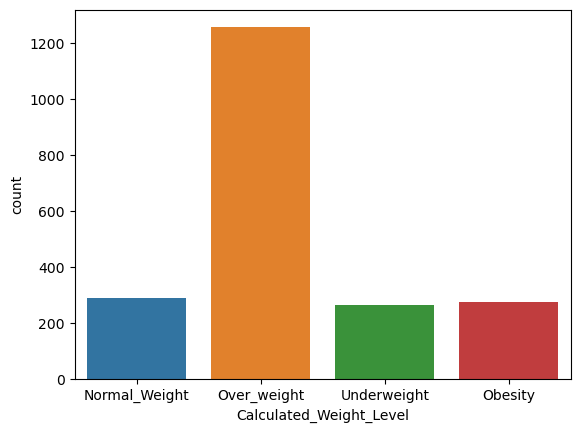

In [91]:
sns.countplot(x = df_new.Calculated_Weight_Level)

##### Gender Vs Calculated_Weight_Level 

In [93]:
df_new.Gender.value_counts()

Gender
Male      1052
Female    1035
Name: count, dtype: int64

In [94]:
df_new.groupby('Gender').Calculated_Weight_Level.value_counts()

Gender  Calculated_Weight_Level
Female  Over_weight                448
        Obesity                    273
        Underweight                167
        Normal_Weight              147
Male    Over_weight                807
        Normal_Weight              144
        Underweight                 98
        Obesity                      3
Name: count, dtype: int64

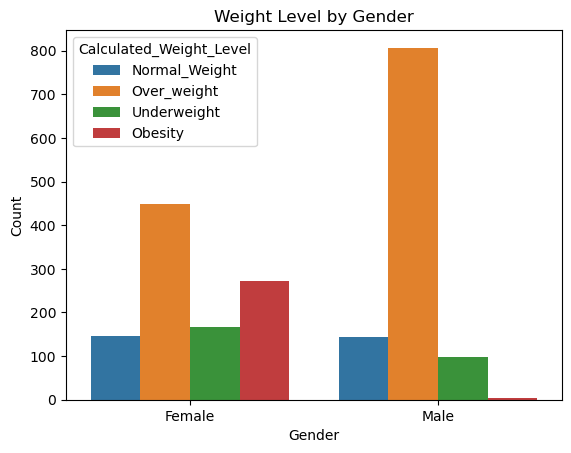

In [97]:
# Create a count plot
sns.countplot(x='Gender', hue='Calculated_Weight_Level', data=df_new)

# Set the title and labels
plt.title('Weight Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

##### Age Vs Calculated_Weight_Level

Text(0, 0.5, 'Age')

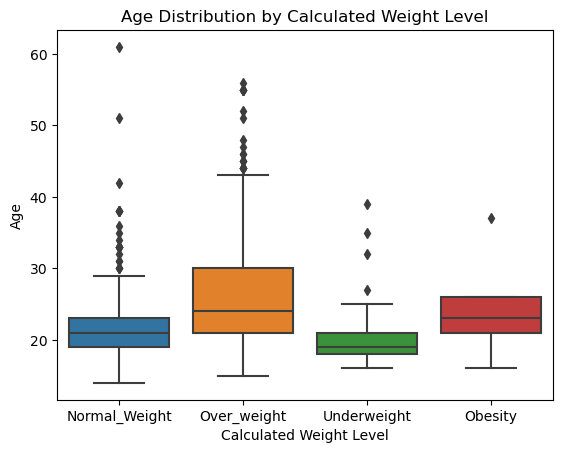

In [98]:
# Create a box plot
sns.boxplot(x='Calculated_Weight_Level', y='Age', data=df_new)

# Set the title and labels
plt.title('Age Distribution by Calculated Weight Level')
plt.xlabel('Calculated Weight Level')
plt.ylabel('Age')

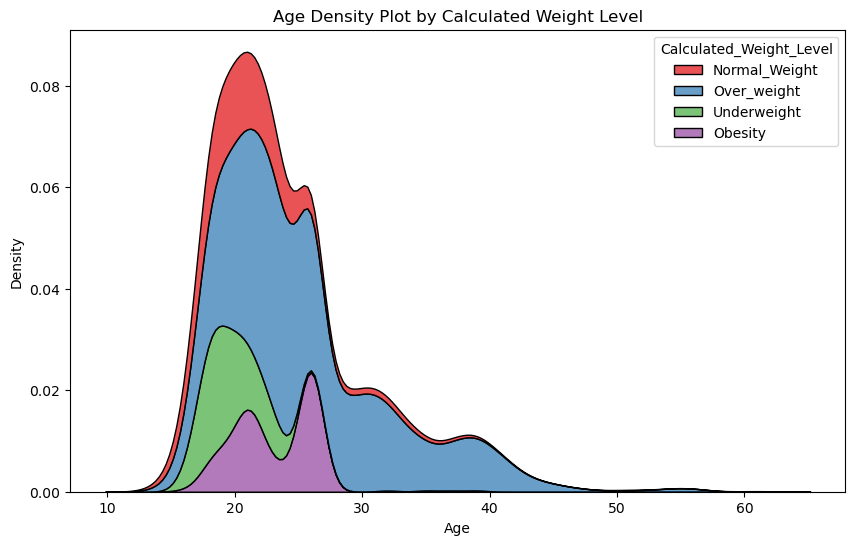

In [127]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_new, x="Age", hue="Calculated_Weight_Level", multiple="stack", palette="Set1")
plt.title('Age Density Plot by Calculated Weight Level')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Text(0, 0.5, 'Age')

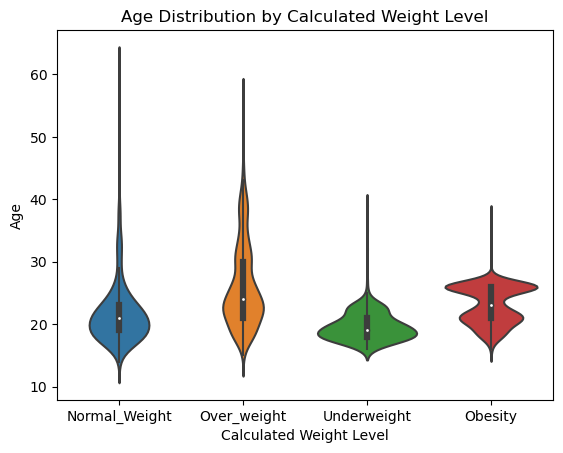

In [131]:
# Create a violin plot
sns.violinplot(x='Calculated_Weight_Level', y='Age', data=df_new)

# Set the title and labels
plt.title('Age Distribution by Calculated Weight Level')
plt.xlabel('Calculated Weight Level')
plt.ylabel('Age')

##### Height Vs Calculted Weight Level

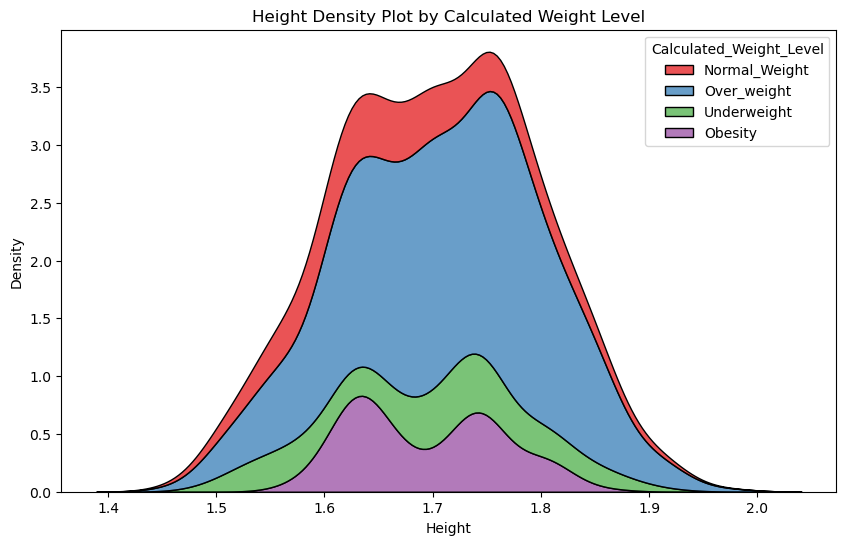

In [177]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_new, x="Height", hue="Calculated_Weight_Level", multiple="stack", palette="Set1")
plt.title('Height Density Plot by Calculated Weight Level')
plt.xlabel('Height')
plt.ylabel('Density')
plt.show()

Text(0, 0.5, 'Height')

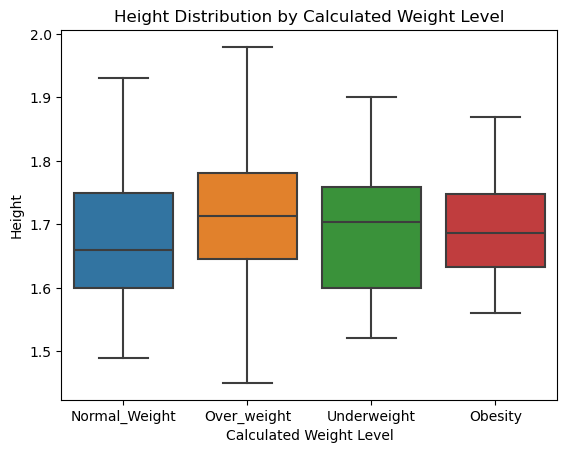

In [124]:
# Create a box plot
sns.boxplot(x='Calculated_Weight_Level', y='Height', data=df_new)

# Set the title and labels
plt.title('Height Distribution by Calculated Weight Level')
plt.xlabel('Calculated Weight Level')
plt.ylabel('Height')

##### Weight Vs Calculted Weight Level

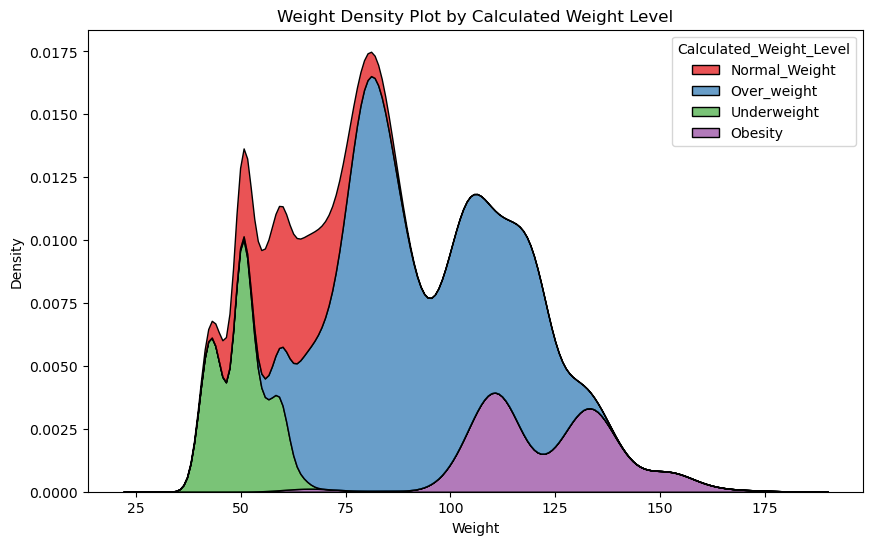

In [178]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_new, x="Weight", hue="Calculated_Weight_Level", multiple="stack", palette="Set1")
plt.title('Weight Density Plot by Calculated Weight Level')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()

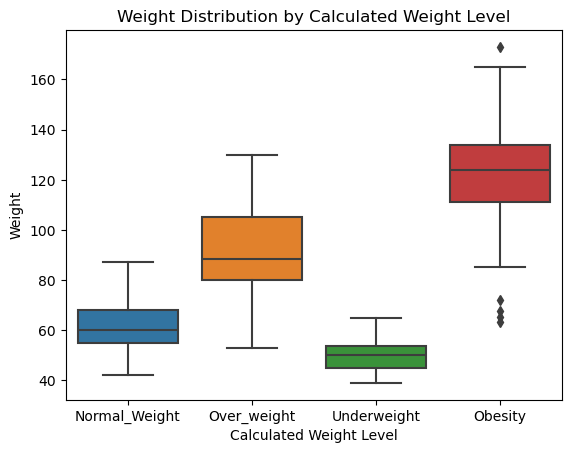

In [162]:
# Create a box plot
sns.boxplot(x='Calculated_Weight_Level', y='Weight', data=df_new)

# Set the title and labels
plt.title('Weight Distribution by Calculated Weight Level')
plt.xlabel('Calculated Weight Level')
plt.ylabel('Weight')
plt.show()

##### BMI Vs Calculated_Weight_Level

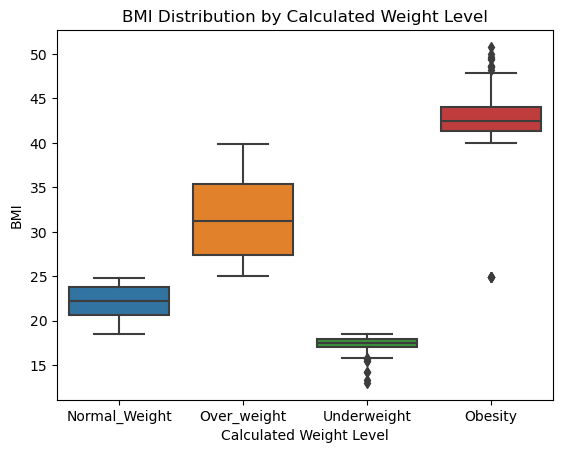

In [160]:
# Create a box plot
sns.boxplot(x='Calculated_Weight_Level', y='BMI', data=df_new)

# Set the title and labels
plt.title('BMI Distribution by Calculated Weight Level')
plt.xlabel('Calculated Weight Level')
plt.ylabel('BMI')
plt.show()

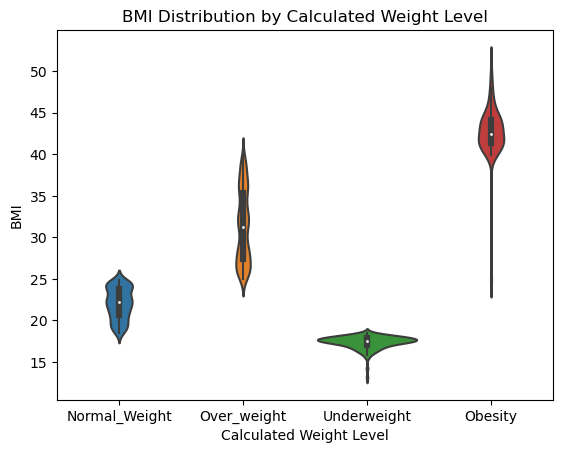

In [161]:
# Create a violin plot
sns.violinplot(x='Calculated_Weight_Level', y='BMI', data=df_new)

# Set the title and labels
plt.title('BMI Distribution by Calculated Weight Level')
plt.xlabel('Calculated Weight Level')
plt.ylabel('BMI')
plt.show()

##### Consumption_Of_Alcohol VS Calculated Weight Level

In [111]:
df_new.Consumption_Of_Alcohol .value_counts()

Consumption_Of_Alcohol
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64

In [112]:
df_new.groupby('Consumption_Of_Alcohol').Calculated_Weight_Level.value_counts()

Consumption_Of_Alcohol  Calculated_Weight_Level
Always                  Normal_Weight                1
Frequently              Over_weight                 51
                        Normal_Weight               18
                        Underweight                  1
Sometimes               Over_weight                792
                        Obesity                    273
                        Normal_Weight              165
                        Underweight                150
no                      Over_weight                412
                        Underweight                114
                        Normal_Weight              107
                        Obesity                      3
Name: count, dtype: int64

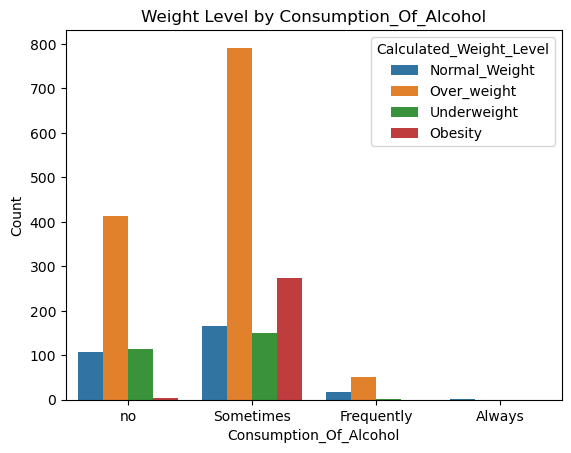

In [120]:
# Create a count plot
sns.countplot(x='Consumption_Of_Alcohol', hue='Calculated_Weight_Level', data=df_new)

# Set the title and labels
plt.title('Weight Level by Consumption_Of_Alcohol')
plt.xlabel('Consumption_Of_Alcohol')
plt.ylabel('Count')

# Show the plot
plt.show()

##### High_Caloric_Food Vs Calculated_Weight_Level

In [115]:
df_new.High_Caloric_Food .value_counts()

High_Caloric_Food
yes    1844
no      243
Name: count, dtype: int64

In [116]:
df_new.groupby('High_Caloric_Food').Calculated_Weight_Level.value_counts()

High_Caloric_Food  Calculated_Weight_Level
no                 Over_weight                 114
                   Normal_Weight                77
                   Underweight                  51
                   Obesity                       1
yes                Over_weight                1141
                   Obesity                     275
                   Normal_Weight               214
                   Underweight                 214
Name: count, dtype: int64

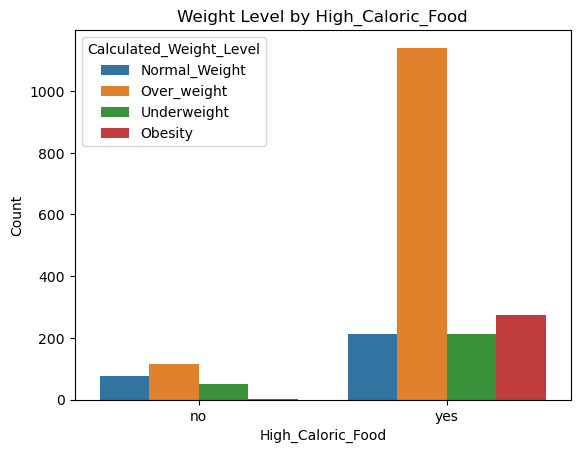

In [119]:
# Create a count plot
sns.countplot(x='High_Caloric_Food', hue='Calculated_Weight_Level', data=df_new)

# Set the title and labels
plt.title('Weight Level by High_Caloric_Food')
plt.xlabel('High_Caloric_Food')
plt.ylabel('Count')

# Show the plot
plt.show()

##### Family_History Vs Calculated_Weight_Level

In [150]:
df_new.Family_History.value_counts()

Family_History
yes    1722
no      365
Name: count, dtype: int64

In [151]:
df_new.groupby('Family_History').Calculated_Weight_Level.value_counts()

Family_History  Calculated_Weight_Level
no              Underweight                 143
                Normal_Weight               134
                Over_weight                  87
                Obesity                       1
yes             Over_weight                1168
                Obesity                     275
                Normal_Weight               157
                Underweight                 122
Name: count, dtype: int64

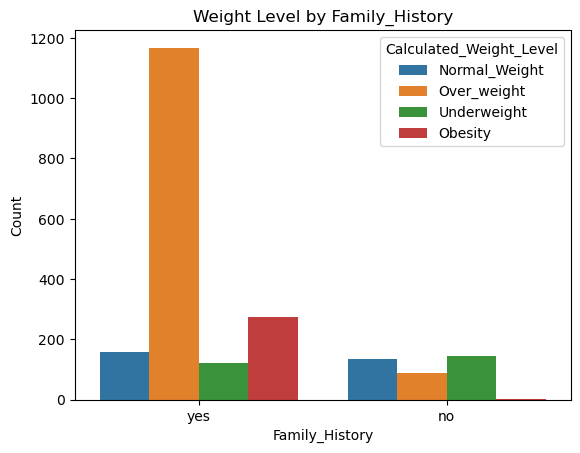

In [159]:
# Create a count plot
sns.countplot(x='Family_History', hue='Calculated_Weight_Level', data=df_new)

# Set the title and labels
plt.title('Weight Level by Family_History')
plt.xlabel('Family_History')
plt.ylabel('Count')

# Show the plot
plt.show()

##### Smoking_Habits  Vs Weight Level by Gender

In [154]:
df_new.Smoking_Habits.value_counts()

Smoking_Habits
no     2043
yes      44
Name: count, dtype: int64

In [155]:
df_new.groupby('Smoking_Habits').Calculated_Weight_Level.value_counts()

Smoking_Habits  Calculated_Weight_Level
no              Over_weight                1226
                Normal_Weight               278
                Obesity                     275
                Underweight                 264
yes             Over_weight                  29
                Normal_Weight                13
                Obesity                       1
                Underweight                   1
Name: count, dtype: int64

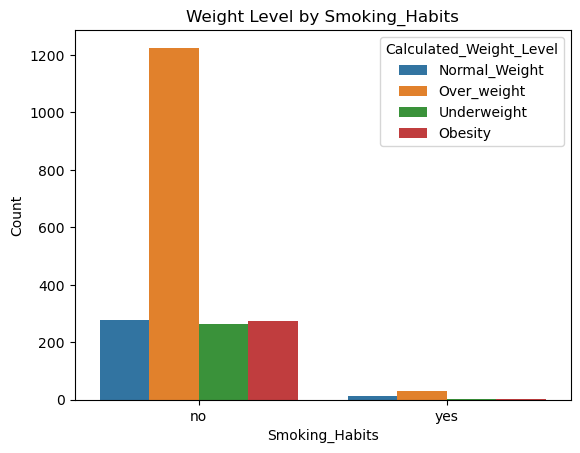

In [158]:
# Create a count plot
sns.countplot(x='Smoking_Habits', hue='Calculated_Weight_Level', data=df_new)

# Set the title and labels
plt.title('Weight Level by Smoking_Habits')
plt.xlabel('Smoking_Habits')
plt.ylabel('Count')

# Show the plot
plt.show()

##### Monitor_Calories Vs Calculated_Weight_Level

In [163]:
df_new.Monitor_Calories.value_counts()

Monitor_Calories
no     1991
yes      96
Name: count, dtype: int64

In [164]:
df_new.groupby('Monitor_Calories').Calculated_Weight_Level.value_counts()

Monitor_Calories  Calculated_Weight_Level
no                Over_weight                1218
                  Obesity                     274
                  Normal_Weight               256
                  Underweight                 243
yes               Over_weight                  37
                  Normal_Weight                35
                  Underweight                  22
                  Obesity                       2
Name: count, dtype: int64

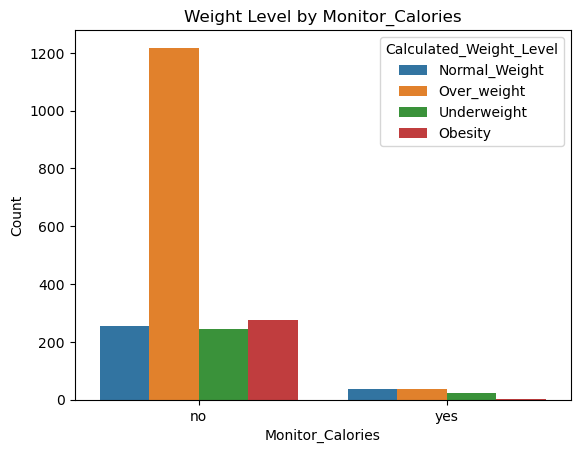

In [165]:
# Create a count plot
sns.countplot(x='Monitor_Calories', hue='Calculated_Weight_Level', data=df_new)

# Set the title and labels
plt.title('Weight Level by Monitor_Calories')
plt.xlabel('Monitor_Calories')
plt.ylabel('Count')

# Show the plot
plt.show()

##### Main_Meals VS Calculated_Weight_Level

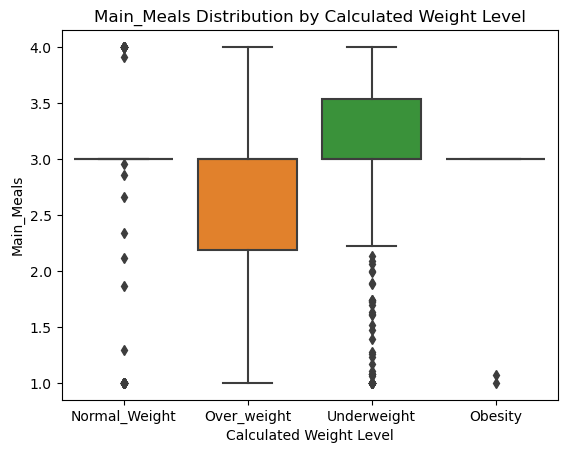

In [166]:
# Create a box plot
sns.boxplot(x='Calculated_Weight_Level', y='Main_Meals', data=df_new)

# Set the title and labels
plt.title('Main_Meals Distribution by Calculated Weight Level')
plt.xlabel('Calculated Weight Level')
plt.ylabel('Main_Meals')
plt.show()

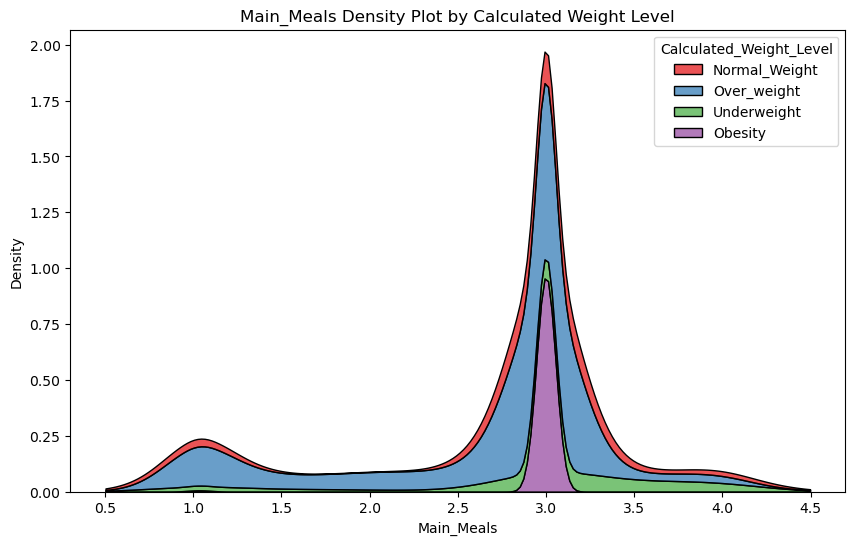

In [167]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_new, x="Main_Meals", hue="Calculated_Weight_Level", multiple="stack", palette="Set1")
plt.title('Main_Meals Density Plot by Calculated Weight Level')
plt.xlabel('Main_Meals')
plt.ylabel('Density')
plt.show()

##### Daily_Water_Intake Vs Calculated_Weight_Level

In [171]:
df_new.Daily_Water_Intake.value_counts()

Daily_Water_Intake
2.000000    445
1.000000    204
3.000000    148
2.825629      3
1.636326      3
           ... 
1.622638      1
2.452986      1
2.035954      1
1.944095      1
2.863513      1
Name: count, Length: 1268, dtype: int64

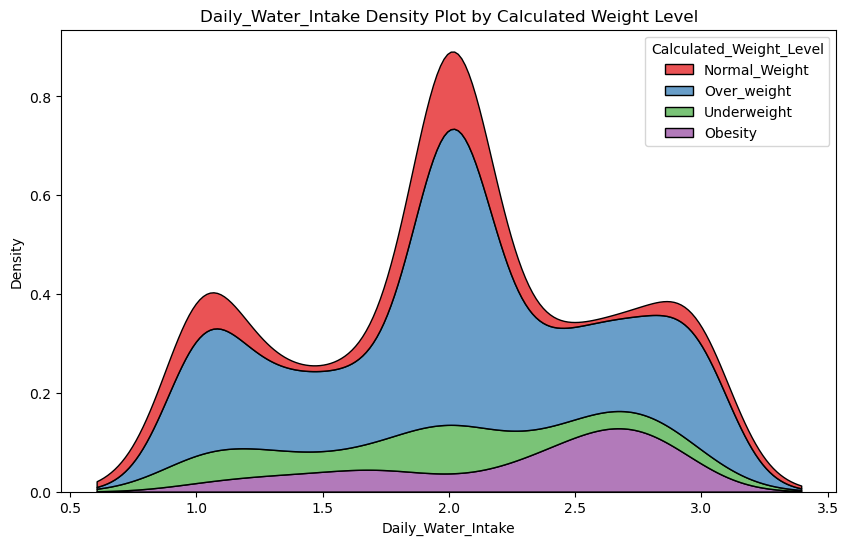

In [176]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_new, x="Daily_Water_Intake", hue="Calculated_Weight_Level", multiple="stack", palette="Set1")
plt.title('Daily_Water_Intake Density Plot by Calculated Weight Level')
plt.xlabel('Daily_Water_Intake')
plt.ylabel('Density')
plt.show()

##### PhysicalActivity Vs Calculated_Weight_Level

In [174]:
df_new.PhysicalActivity.value_counts()

PhysicalActivity
0.000000    405
1.000000    217
2.000000    182
3.000000     75
0.110174      2
           ... 
1.916751      1
0.954459      1
0.340915      1
0.986414      1
1.026452      1
Name: count, Length: 1190, dtype: int64

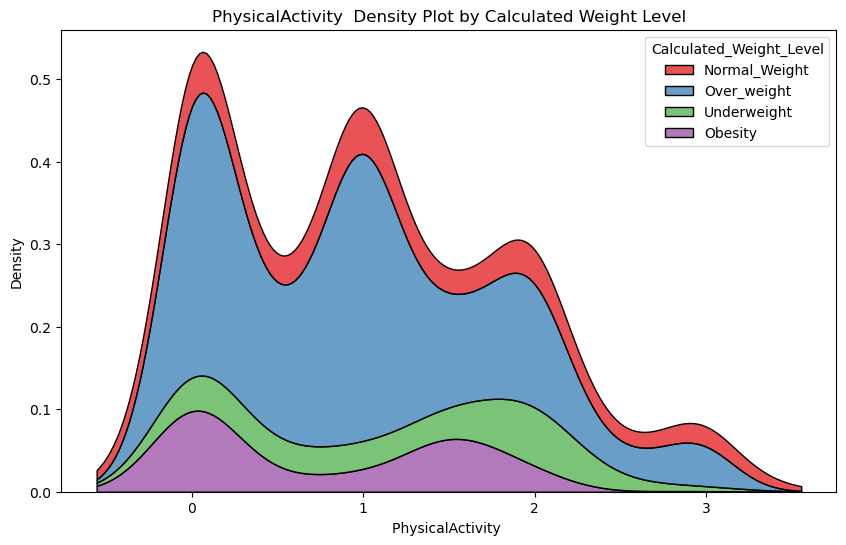

In [180]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_new, x="PhysicalActivity", hue="Calculated_Weight_Level", multiple="stack", palette="Set1")
plt.title('PhysicalActivity  Density Plot by Calculated Weight Level')
plt.xlabel('PhysicalActivity ')
plt.ylabel('Density')
plt.show()

##### Time_Using_Technology Vs Calculated_Weight_Level

In [181]:
df_new.Time_Using_Technology.value_counts()

Time_Using_Technology
0.000000    537
1.000000    289
2.000000    108
0.630866      4
1.119877      3
           ... 
1.343044      1
1.019452      1
0.673408      1
0.997600      1
0.714137      1
Name: count, Length: 1129, dtype: int64

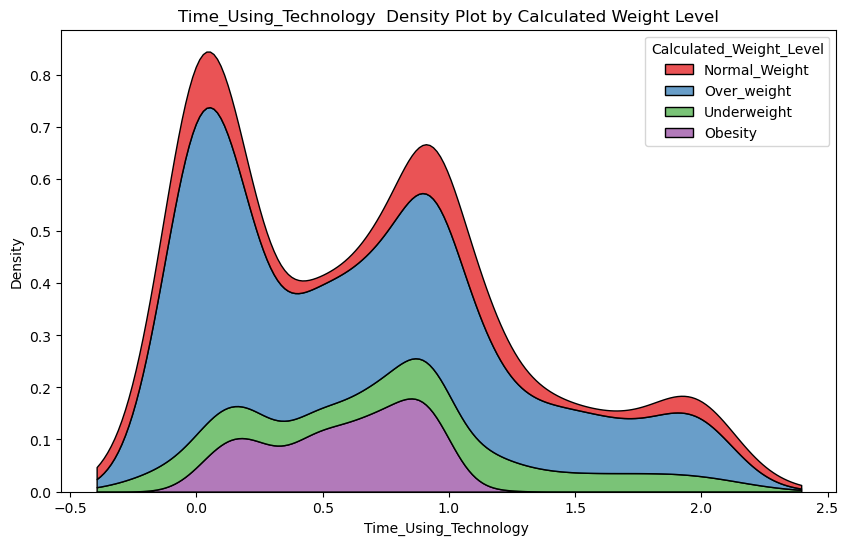

In [182]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_new, x="Time_Using_Technology", hue="Calculated_Weight_Level", multiple="stack", palette="Set1")
plt.title('Time_Using_Technology  Density Plot by Calculated Weight Level')
plt.xlabel('Time_Using_Technology ')
plt.ylabel('Density')
plt.show()

##### Food_between_Meal Vs Calculated_Weight_Level

In [183]:
df_new.Food_between_Meal.value_counts()

Food_between_Meal
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64

In [184]:
df_new.groupby('Food_between_Meal').Calculated_Weight_Level.value_counts()

Food_between_Meal  Calculated_Weight_Level
Always             Normal_Weight                34
                   Over_weight                  16
                   Underweight                   2
                   Obesity                       1
Frequently         Underweight                 114
                   Normal_Weight                84
                   Over_weight                  37
                   Obesity                       1
Sometimes          Over_weight                1178
                   Obesity                     274
                   Normal_Weight               163
                   Underweight                 146
no                 Over_weight                  24
                   Normal_Weight                10
                   Underweight                   3
Name: count, dtype: int64

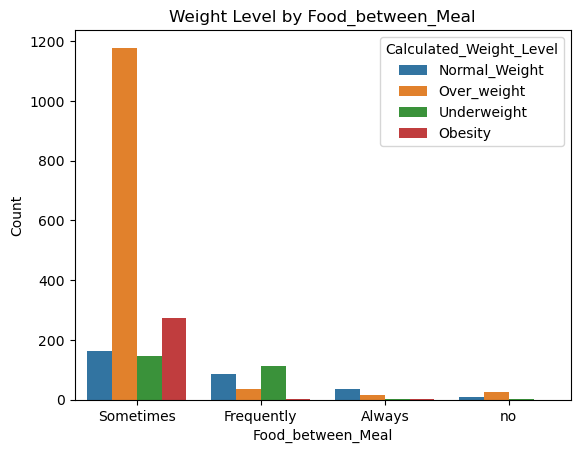

In [185]:
# Create a count plot
sns.countplot(x='Food_between_Meal', hue='Calculated_Weight_Level', data=df_new)

# Set the title and labels
plt.title('Weight Level by Food_between_Meal')
plt.xlabel('Food_between_Meal')
plt.ylabel('Count')

# Show the plot
plt.show()


##### Transportation vs Calculated_Weight_Level

In [186]:
df_new.Transportation.value_counts()

Transportation
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [188]:
df_new.groupby('Transportation').Calculated_Weight_Level.value_counts()

Transportation         Calculated_Weight_Level
Automobile             Over_weight                362
                       Normal_Weight               47
                       Underweight                 45
                       Obesity                      2
Bike                   Normal_Weight                4
                       Over_weight                  3
Motorbike              Normal_Weight                6
                       Over_weight                  5
Public_Transportation  Over_weight                867
                       Obesity                    274
                       Underweight                214
                       Normal_Weight              203
Walking                Normal_Weight               31
                       Over_weight                 18
                       Underweight                  6
Name: count, dtype: int64

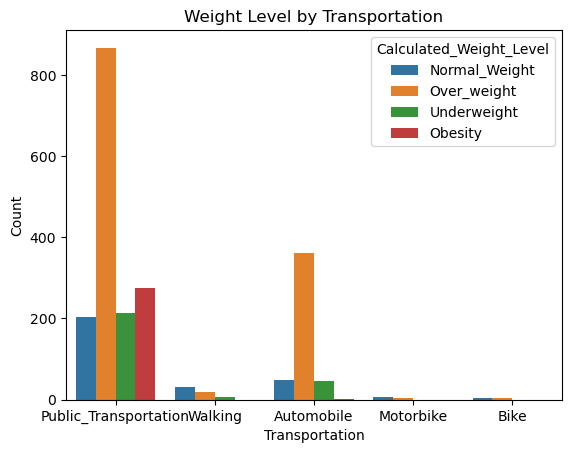

In [189]:
# Create a count plot
sns.countplot(x='Transportation', hue='Calculated_Weight_Level', data=df_new)

# Set the title and labels
plt.title('Weight Level by Transportation')
plt.xlabel('Transportation')
plt.ylabel('Count')

# Show the plot
plt.show()


In [191]:
df_new.dtypes

Age                        float64
Gender                      object
Height                     float64
Weight                     float64
BMI                        float64
Consumption_Of_Alcohol      object
High_Caloric_Food           object
Vegetables_in_Meal           int64
Main_Meals                 float64
Monitor_Calories            object
Smoking_Habits              object
Daily_Water_Intake         float64
Family_History              object
PhysicalActivity           float64
Time_Using_Technology      float64
Food_between_Meal           object
Transportation              object
Calculated_Weight_Level     object
dtype: object

In [193]:
df_final = df_new[['Age', 'Gender', 'Height', 'Weight', 'BMI', 'Family_History', 'High_Caloric_Food', 'Main_Meals', 'Food_between_Meal',
                   'Consumption_Of_Alcohol', 'Transportation','Monitor_Calories','Calculated_Weight_Level' ]]

In [195]:
df_final.head()

,Age,Gender,Height,Weight,BMI,Family_History,High_Caloric_Food,Main_Meals,Food_between_Meal,Consumption_Of_Alcohol,Transportation,Monitor_Calories,Calculated_Weight_Level
0,21.0,Female,1.62,64.0,24.39,yes,no,3.0,Sometimes,no,Public_Transportation,no,Normal_Weight
1,21.0,Female,1.52,56.0,24.24,yes,no,3.0,Sometimes,Sometimes,Public_Transportation,yes,Normal_Weight
2,23.0,Male,1.80,77.0,23.77,yes,no,3.0,Sometimes,Frequently,Public_Transportation,no,Normal_Weight
3,27.0,Male,1.80,87.0,26.85,no,no,3.0,Sometimes,Frequently,Walking,no,Over_weight
4,22.0,Male,1.78,89.8,28.34,no,no,1.0,Sometimes,Sometimes,Public_Transportation,no,Over_weight


In [198]:
X = df_final.drop('Calculated_Weight_Level',axis = 1)

In [201]:
X_new = pd.get_dummies(X,drop_first=True).astype('int')

In [202]:
y = df_final['Calculated_Weight_Level']

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [207]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size = 0.3,random_state=0)

In [208]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [210]:
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

In [211]:
from sklearn.metrics import confusion_matrix, classification_report

In [213]:
print(classification_report(y_train,y_train_pred))

               precision    recall  f1-score   support

Normal_Weight       0.57      0.44      0.50       213
      Obesity       0.80      0.91      0.85       192
  Over_weight       0.88      0.92      0.90       869
  Underweight       0.78      0.71      0.74       186

     accuracy                           0.82      1460
    macro avg       0.76      0.74      0.75      1460
 weighted avg       0.81      0.82      0.81      1460



In [214]:
print(classification_report(y_test,y_test_pred))

               precision    recall  f1-score   support

Normal_Weight       0.60      0.58      0.59        78
      Obesity       0.86      0.93      0.89        84
  Over_weight       0.92      0.94      0.93       386
  Underweight       0.79      0.68      0.73        79

     accuracy                           0.86       627
    macro avg       0.79      0.78      0.79       627
 weighted avg       0.86      0.86      0.86       627



In [216]:
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [217]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

In [218]:
print(classification_report(y_train,y_train_pred))

               precision    recall  f1-score   support

Normal_Weight       1.00      1.00      1.00       213
      Obesity       1.00      0.99      0.99       192
  Over_weight       1.00      1.00      1.00       869
  Underweight       1.00      1.00      1.00       186

     accuracy                           1.00      1460
    macro avg       1.00      1.00      1.00      1460
 weighted avg       1.00      1.00      1.00      1460



In [219]:
print(classification_report(y_test,y_test_pred))

               precision    recall  f1-score   support

Normal_Weight       0.97      0.94      0.95        78
      Obesity       1.00      0.99      0.99        84
  Over_weight       1.00      1.00      1.00       386
  Underweight       0.94      0.99      0.96        79

     accuracy                           0.99       627
    macro avg       0.98      0.98      0.98       627
 weighted avg       0.99      0.99      0.99       627

